In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from pandas.plotting import parallel_coordinates
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data= pd.read_csv('.../IRIS.csv')
iris_data=iris_data.sample(frac=1)
iris_data=iris_data.reset_index(drop=True)


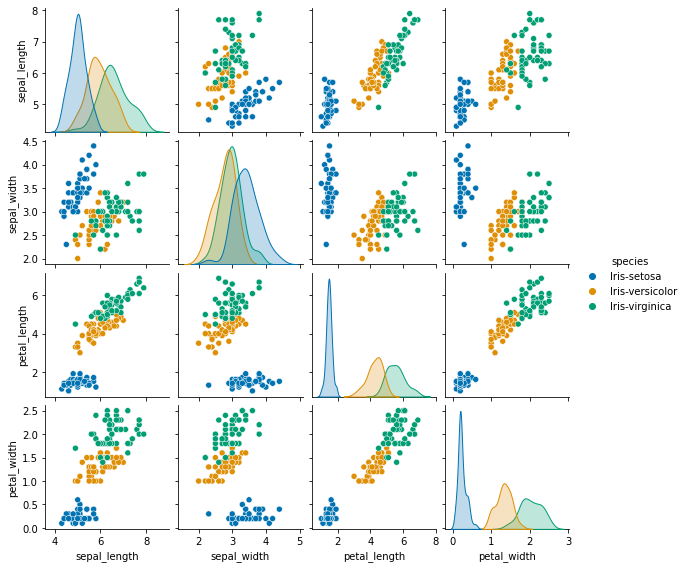

In [ ]:
sns.pairplot(data, hue="species", height = 2, palette = 'colorblind');

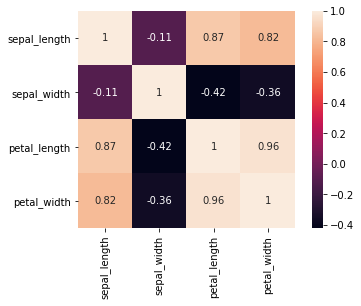

In [ ]:
corrmat = data.corr()
sns.heatmap(corrmat, annot = True, square = True);

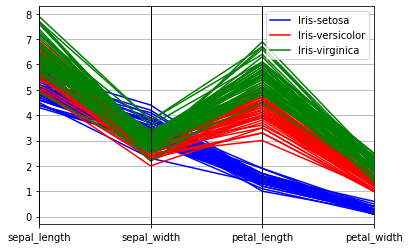

In [ ]:
parallel_coordinates(data, "species", color = ['blue', 'red', 'green']);

In [ ]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data["species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: species, dtype: int64

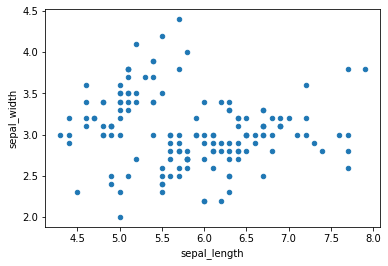

In [ ]:
data.plot(kind="scatter", x="sepal_length", y="sepal_width")
plt.show()

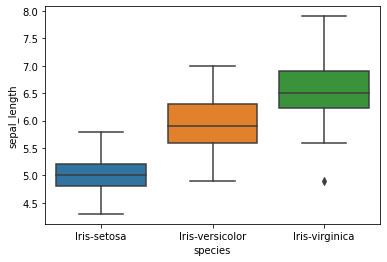

In [ ]:
sns.boxplot(x="species", y="sepal_length", data=data )

plt.show()

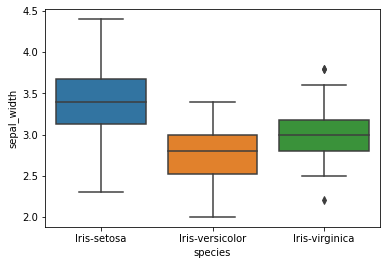

In [ ]:
sns.boxplot(x="species", y="sepal_width", data=data )
plt.show()

In [ ]:
ax= sns.boxplot(x="species", y="sepal_length", data=data)
ax= sns.stripplot(x="species", y="sepal_length", data=data, jitter=True, edgecolor="gray")
plt.show()

In [ ]:
x=iris_data.iloc[:,:-1].values
y=iris_data.iloc[: , 4]
y=np.array(y).reshape(-1,1)
y.shape
y

array([['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-versicolor'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-versicolor']

In [ ]:

encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y)

print(y)

# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20)
train_x.dtype

[[1. 0. 0. ... 0. 0. 1.]
 [0. 1. 1. ... 1. 1. 0.]
 [0. 1. 1. ... 1. 1. 0.]
 ...
 [1. 0. 0. ... 1. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 1. 1. 0.]]


dtype('float64')

In [ ]:
# Build the model

model = Sequential()

model.add(Dense(10, input_shape=(4,), activation='relu', name='fc1'))
model.add(Dense(10, activation='relu', name='fc2'))
model.add(Dense(5, activation='relu', name='fc3'))
model.add(Dense(3, activation='softmax', name='output'))

# Adam optimizer with learning rate of 0.001
optimizer = Adam(lr=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

#print('Neural Network Model Summary: ')
#print(model.summary())

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:

# Train the model
model.fit(train_x, train_y, verbose=2, batch_size=5, epochs=500)

# Test on unseen data

results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))


Epoch 1/500
24/24 - 1s - loss: 1.1141 - accuracy: 0.3167
Epoch 2/500
24/24 - 0s - loss: 0.8781 - accuracy: 0.5167
Epoch 3/500
24/24 - 0s - loss: 0.7623 - accuracy: 0.6667
Epoch 4/500
24/24 - 0s - loss: 0.6913 - accuracy: 0.6667
Epoch 5/500
24/24 - 0s - loss: 0.6221 - accuracy: 0.6667
Epoch 6/500
24/24 - 0s - loss: 0.5648 - accuracy: 0.6667
Epoch 7/500
24/24 - 0s - loss: 0.5288 - accuracy: 0.6667
Epoch 8/500
24/24 - 0s - loss: 0.5008 - accuracy: 0.6833
Epoch 9/500
24/24 - 0s - loss: 0.4793 - accuracy: 0.7083
Epoch 10/500
24/24 - 0s - loss: 0.4596 - accuracy: 0.8000
Epoch 11/500
24/24 - 0s - loss: 0.4449 - accuracy: 0.9083
Epoch 12/500
24/24 - 0s - loss: 0.4228 - accuracy: 0.9667
Epoch 13/500
24/24 - 0s - loss: 0.4075 - accuracy: 0.9667
Epoch 14/500
24/24 - 0s - loss: 0.3901 - accuracy: 0.9667
Epoch 15/500
24/24 - 0s - loss: 0.3757 - accuracy: 0.9833
Epoch 16/500
24/24 - 0s - loss: 0.3587 - accuracy: 0.9500
Epoch 17/500
24/24 - 0s - loss: 0.3406 - accuracy: 0.9667
Epoch 18/500
24/24 - 0s

In [ ]:
res=model.predict([[5.9,3,5.1,1.8]])
if np.argmax(res[0]) == 0 :
  print("Iris-setosa")
elif np.argmax(res[0]) == 1 :
   print("Iris-versicolor")
else :
   print("Iris-virginica")    
  

Iris-virginica
